In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f_houghCircles(E):
    numRows , numCols = E.shape[0] , E.shape[1]
    dMax = int((numRows**2 + numCols**2)**0.5)
    H = np.zeros((numRows,numCols,dMax))
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1]
    for i in range(len(r)):
        for a in range(numRows):
            for b in range(numCols):
                ri,ci = r[i] , c[i]
                di = int(((ri-a)**2 + (ci-b)**2)**0.5) # equation for circle
                if di > 0 and di < dMax:
                    H[a,b,di] += 1
    return H

In [3]:
E = cv2.imread(r'Ec.png',cv2.IMREAD_GRAYSCALE)

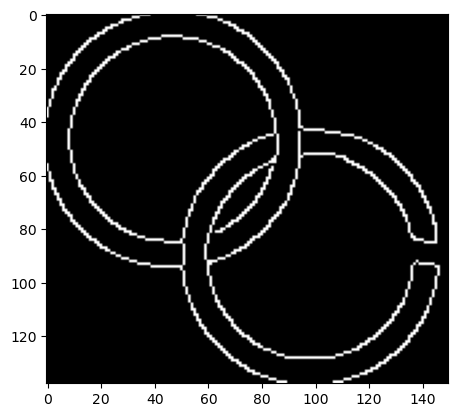

In [7]:
E = E>100
plt.imshow(E,cmap='gray')

In [20]:
H = f_houghCircles(E)

In [9]:
idx = np.argwhere(H==H.max())
best_cr,best_cc,best_d = idx[0,0] , idx[0,1], idx[0,2]

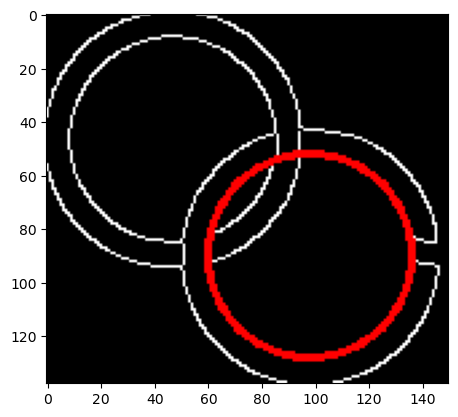

In [11]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])

# Drawing multiple circles

In [21]:
def nlargest_indices(arr,n): # recieves an array and returns n maximum vlaues of H
    uniques = np.unique(arr)
    th = uniques(-n)
    return np.where(arr>=th)

In [22]:
n = 10
x, y, z = nlargest_indices(H, n)
plt.subplot(131)
for i in(range(n)):
    idx = x[0], y[0],
    best_cr, best_cc, best_d = x[i], y[i], z[i]
    E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
    E3 = np.array(255*E,dtype = np.uint8)
    E2[:,:,0] = E3
    E2[:,:,1] = E3
    E2[:,:,2] = E3
    I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
    fig, ax = plt.subplots(figsize=(9,5))
    plt.imshow(I[:,:,::-1])

TypeError: 'numpy.ndarray' object is not callable